# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

## Agenda
**Introduction to Clustering**

**Visualizations & Results/ Analysis & Comparison/ Performance summary**

    1. DBSCAN, k-Means, Hierarchical on Dataset A: 'make_moons'

    2. DBSCAN, k-Means, Hierarchical on Dataset B: 'make_blobs'


## Introduction
DBSCAN groups data points based on density rather than distance from a center (like k-means). It defines clusters as areas of high point density separated by areas of low density.

*Key Parameters*: 
*Epsilon (ε)*: Defines the neighborhood radius around a point.
The most important parameter to choose appropriately is for the data set and the distance function. 

The max distance between 2 samples for one is considered as core point

*min_samples*: The minimum number of points required to form a dense region and core point (including the point itself). DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be sparser.


In [2]:
from sklearn.cluster import DBSCAN

In [ ]:
?DBSCAN

### FUNCTION SET_UP
First, set up  function for: 

    1. plot_clustering_resutls 

    2. kn_agglo_clustering_comparison

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Function to plot clustering results
# This function takes in the data points, the name of the clustering algorithm 
# Resource: BINF5507-lab5

def plot_clustering_results(x, name_of_clustering,labels):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    x : array-like, shape (n_samples, n_features)
        The input data points.
    name_of_clustering: str
        The name of the clustering algorithm used.
        This is used for the plot title.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6))

    # Plot the clustering result
    plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{name_of_clustering} Clustering Result')


# Function to compare k-NN and Agglomerative clustering algorithms
# on a given dataset and print silhouette scores
# This function assumes that the dataset is already loaded and preprocessed.
#Resource: BINF5507-lab5
def knn_agglo_clustering_comparison(dataset_name, x,y):
    """
    Compares clustering algorithms (k-NN and Agglomerative) on the dataset and prints silhouette scores. 
    
    Parameters:
    data_name : str
        The name of the dataset being used.
    x : array-like, shape (n_samples, n_features)
    y: array-like, shape (n_samples,)
        The input data points and their true labels.
    Returns:
    None
    """

    #Define best parameters for k-Means and Agglomerative Clustering
    from sklearn.model_selection import GridSearchCV

    # Define parameter grids
    param_grid_kmeans = {'n_clusters': [2,3,4,5]}
    param_grid_agg = {'n_clusters':[2,3,4,5], 'linkage':['ward', 'complete', 'average']}
    # Perform grid search for agglomerative clustering
    def custom_silhouette_scorer(estimator, x):
        labels = estimator.fit_predict(x)
        return silhouette_score(x, labels)
    
    #Perform search for k-Means
    grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring= custom_silhouette_scorer)
    grid_search_kmeans.fit(x)
    
    #perform grid search for Agglomerative Clustering
    grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring= custom_silhouette_scorer)
    grid_search_agg.fit(x)

    
    #PERFOMR CLUSTERING ALGORITHMS
    #perform k-Means clustering
    kmeans = KMeans(n_clusters=grid_search_kmeans.best_params_['n_clusters'], random_state=42)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)\
    
    #perform Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=grid_search_agg.best_params_['n_clusters'], linkage=grid_search_agg.best_params_['linkage'])
    agglo_clusters = agglo.fit_predict(x)
    
    #visualize the clustering results

    
    plot_clustering_results(x, labels=y_kmeans, name_of_clustering="K-Means")
    plot_clustering_results(x, labels=agglo_clusters, name_of_clustering="Agglomerative Clustering")
    
    plt.show()
    
    # Calculate silhouette scores
    for name, labels in [("K-Means", y_kmeans), ("Agglomerative Clustering", agglo_clusters)]:
        silhouette_avg = silhouette_score(x, labels)
        print(f"Silhouette Score for {name}: {silhouette_avg}")

## Visualizations & Results/ Analysis & Comparison/ Performance summary
(Using sklearn Datasets)
make_moons(n_samples=300, noise=0.05)

make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])


### MAKE_MOONS Dataset - where DBSCAN excels (e.g., non-spherical clusters, datasets with noise)
using make_moons data set from sklearn.datasets

#### Visualize the data + Determine best parameters for each clustering algorithm 

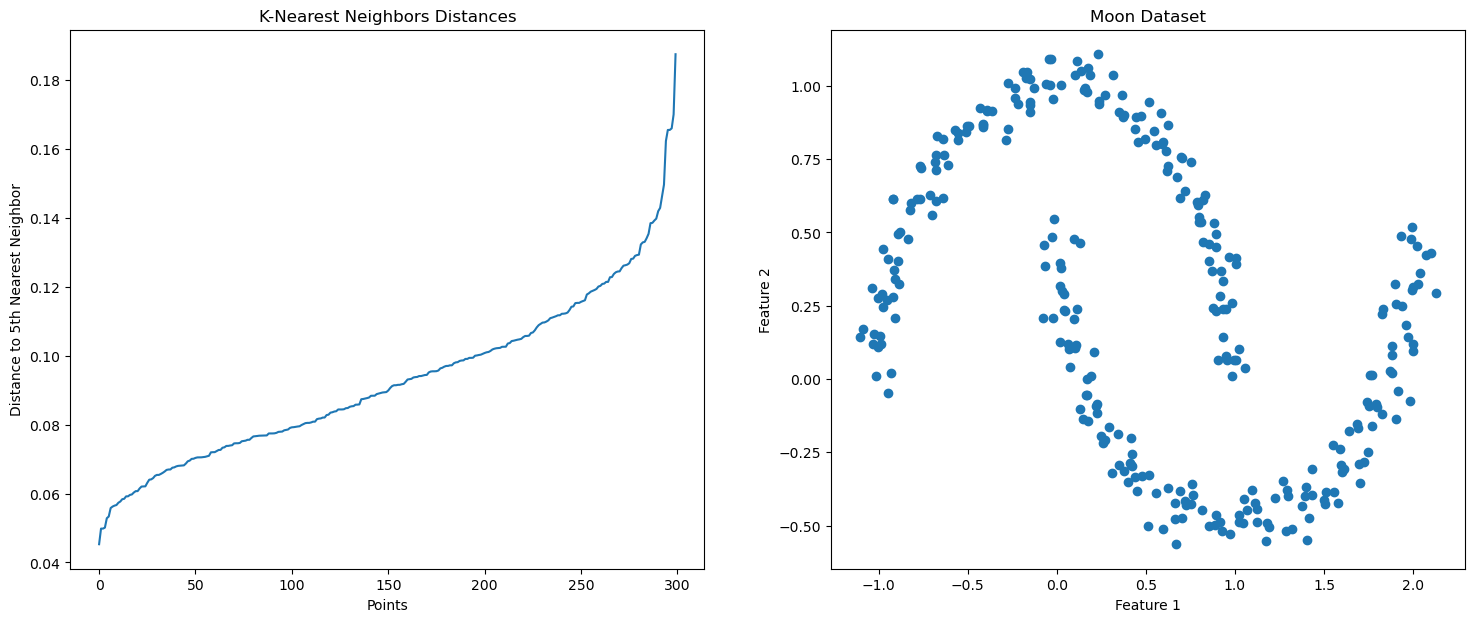

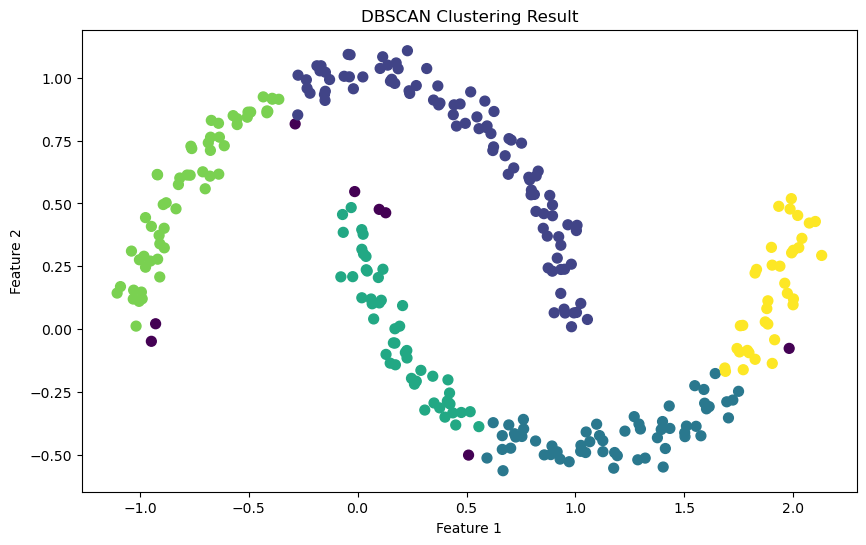

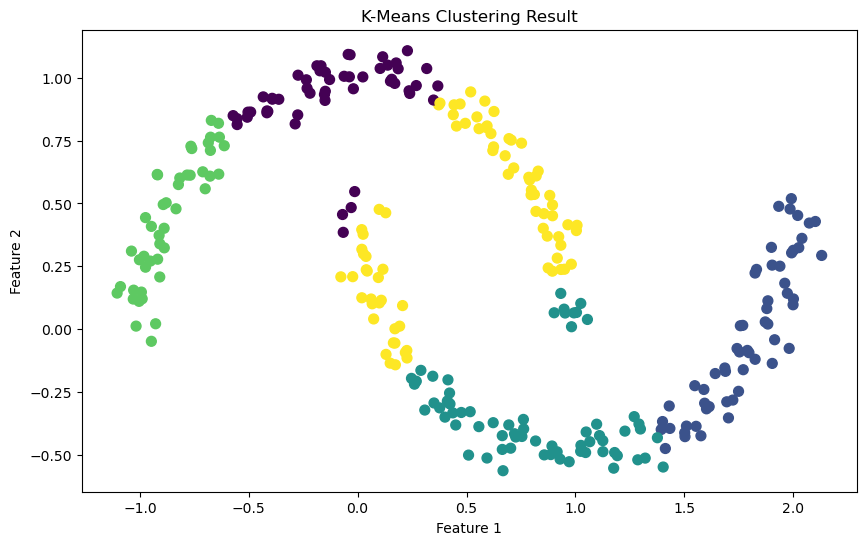

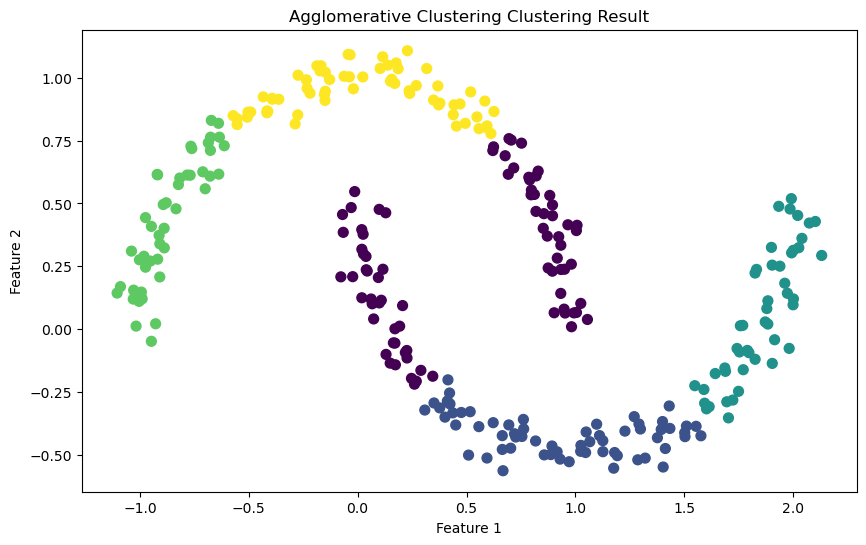

Silhouette Score for K-Means: 0.4351558343337297
Silhouette Score for Agglomerative Clustering: 0.42590036301308243
Silhouette Score for DBSCAN: 0.4300459412153109


In [47]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#load data
moon = make_moons(n_samples=300, noise=0.05, random_state=42)
x, y = moon

#DBSCAN: plot k-nearest neighbors to choose epsilon (Source: Datacamp.com)
neighbors = NearestNeighbors(n_neighbors=6)
neighbors.fit(x)
distances, _ = neighbors.kneighbors(x)
distances = np.sort(distances[:,5])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
ax1.plot(distances)
ax1.set_title('K-Nearest Neighbors Distances')
ax1.set_xlabel('Points')
ax1.set_ylabel('Distance to 5th Nearest Neighbor')

# Visualize the dataset
ax2.scatter(x[:, 0], x[:, 1])
ax2.set_title('Moon Dataset')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.show()

#perform DBSCAN clustering
dbscan = DBSCAN(eps=0.11, min_samples=6)
dbscan_clusters= dbscan.fit_predict(x)

#plot the clustering results
plot_clustering_results(x, labels=dbscan_clusters, name_of_clustering="DBSCAN")

knn_agglo_clustering_comparison("Moon", x, y)

# Calculate silhouette score for DBSCAN clusters
silhouette_avg = silhouette_score(x, dbscan_clusters)
print(f"Silhouette Score for DBSCAN: {silhouette_avg}")


### MAKE_BLOBS - Dataset where DBSCAN struggles (e.g., varying densities, diffi culty tuning eps)

#### Visualize the data + Determine best parameters for each clustering algorithm 

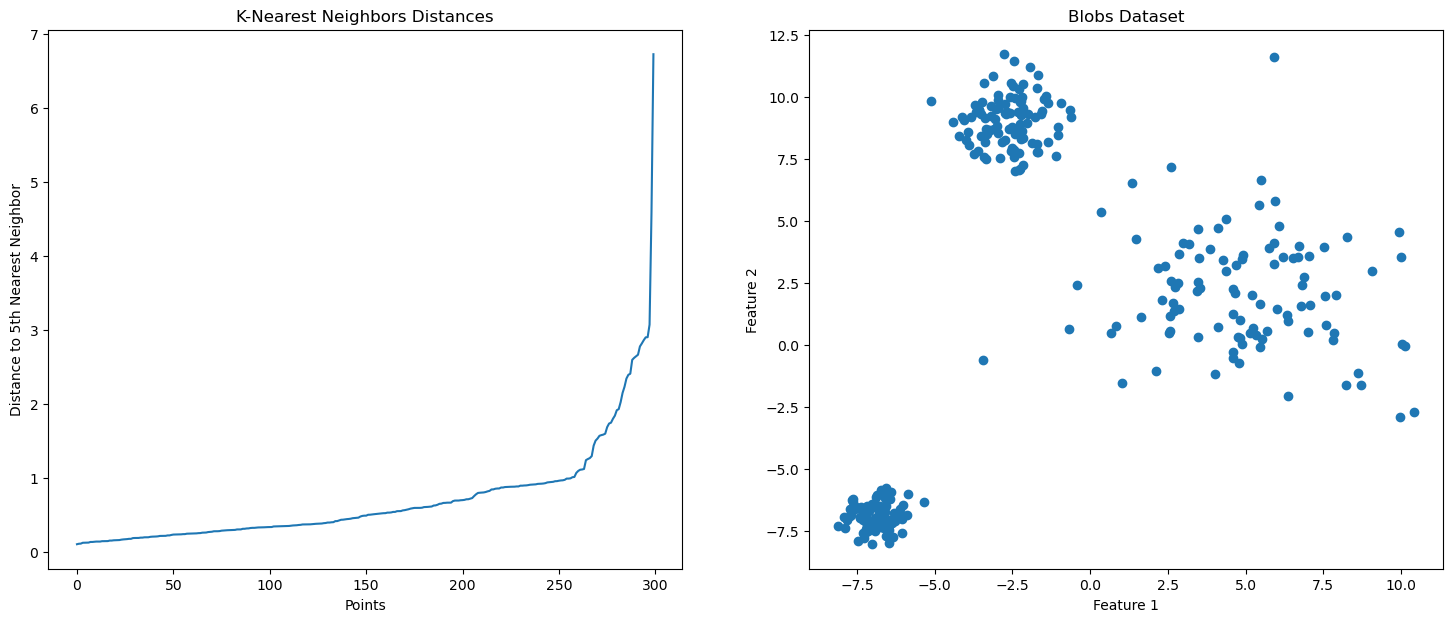

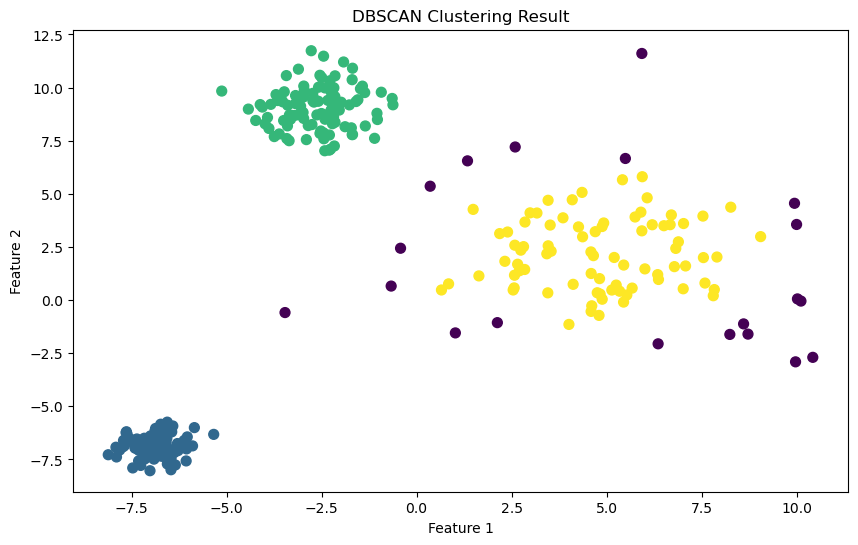

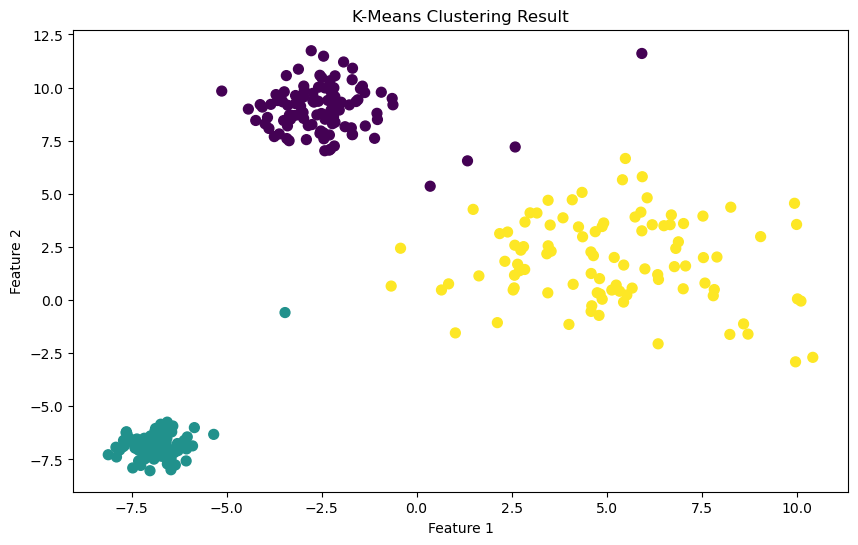

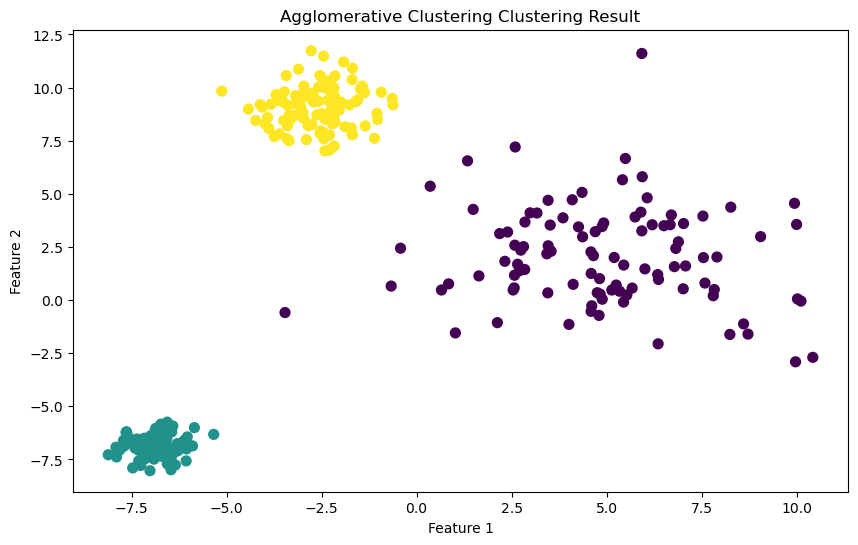

Silhouette Score for K-Means: 0.787118817400286
Silhouette Score for Agglomerative Clustering: 0.7829608619633761
Silhouette Score for DBSCAN: 0.7057070119541451


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#load data
blobs = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
x, y = blobs

#DBSCAN: plot k-nearest neighbors to choose epsilon
neighbors = NearestNeighbors(n_neighbors=6)
neighbors.fit(x)
distances, _ = neighbors.kneighbors(x)
distances = np.sort(distances[:,5])

# Plot the k-nearest neighbors distances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
ax1.plot(distances)
ax1.set_title('K-Nearest Neighbors Distances')
ax1.set_xlabel('Points')
ax1.set_ylabel('Distance to 5th Nearest Neighbor')

# Visualize the dataset
ax2.scatter(x[:, 0], x[:, 1])
ax2.set_title('Blobs Dataset')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.show()
#perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=6) #based on the k-neaest neighbors plot
dbscan_clusters= dbscan.fit_predict(x)

#plot the clustering results
plot_clustering_results(x, labels=dbscan_clusters, name_of_clustering="DBSCAN")
knn_agglo_clustering_comparison("Blobs", x, y)

silhouette_avg = silhouette_score(x, dbscan_clusters)
print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
